# Image Segmentation

## Goal of Image Segmentation

* transformer encoder takes in a binary image, need to separate hand
* Segment hand from background to feed into transformer encoder

<div style="text-align:center;">
    <img src="segmented_hand.jpg" alt="Segmented Hand" style="width:300px;height:auto;">
</div>

## Image Segmentation Techniques

* Simple Thresholding
* Otsu's Method
* Adaptive Thresholding
* Contouring

## Image Segmentation Techniques

* Simple Thresholding
    * user-defined global threshold level
    * all pixels compared against threshold then separated into binary label

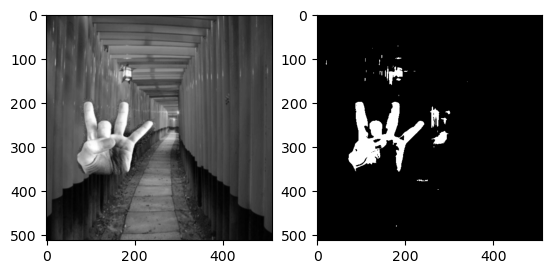

In [1]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import io
from skimage import color
from skimage import filters
import warnings
from scipy.ndimage import gaussian_filter
import cv2 as cv

img = cv.imread('Gesture8_shrine_poisson.jpg', cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img,(3,3),0)
fig, ax = plt.subplots(1,2)

ret, th1 = cv.threshold(img, 150, 255, cv.THRESH_BINARY)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(th1, cmap="gray")

Text(0, 0.5, 'pixels')

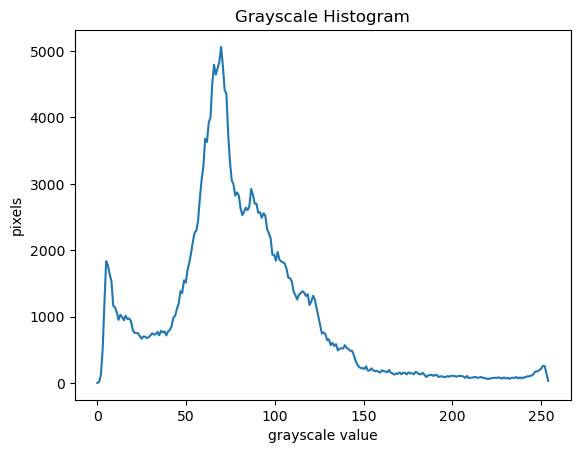

In [2]:
histogram, bin_edges = np.histogram(img, bins=256, range=(0, 255))

fig, ax = plt.subplots()
ax.plot(bin_edges[0:-1], histogram)
ax.set_title("Grayscale Histogram")
ax.set_xlabel("grayscale value")
ax.set_ylabel("pixels")

## Image Segmentation Techniques

* Otsu's Method
    * optimization to simple thresholding
    * automatically determines optimal threshold 
    * minimizes weighted within class variance

93.0


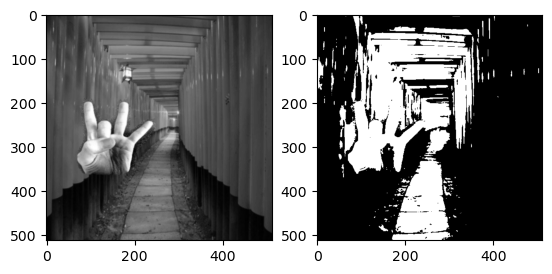

In [3]:
img = cv.imread('Gesture8_shrine_poisson.jpg', cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img,(3,3),0)
fig, ax = plt.subplots(1,2)

ret, th3 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

print(ret)
ax[0].imshow(img, cmap="gray")
ax[1].imshow(th3, cmap="gray")

## Image Segmentation Techniques

* Adaptive Thresholding
    * instead of global threshold value, use local region of neighboring pixels
        * mean of surrounding pixels
        * gaussian-weighted sum of pixels
    * good for images with different lighting conditions, e.g. shadows 

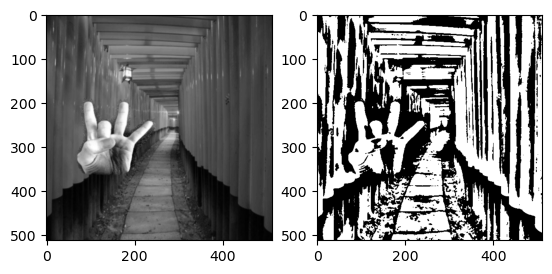

In [4]:
img = cv.imread('Gesture8_shrine_poisson.jpg', cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img,(3,3),0)
fig, ax = plt.subplots(1,2)

th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 61, 2)

ax[0].imshow(img, cmap="gray")
ax[1].imshow(th2, cmap="gray")

## Image Segmentation Techniques

* Contouring
    * performs border following on binary images
    * added step after thresholding to find hand
    

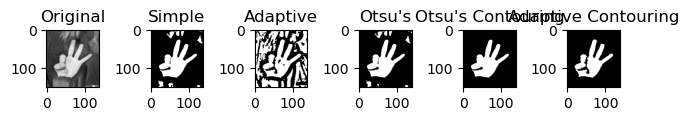

In [5]:
img_file = "Gesture9_b_hands_poisson_cropped.jpg"

img = cv.imread('result/cropped/' + img_file, cv.IMREAD_GRAYSCALE)
img = cv.GaussianBlur(img,(3,3),0)
fig, ax = plt.subplots(1,6)

ret, th1 = cv.threshold(img, 150, 255, cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 2)
ret, th3 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

adaptive_contours, adaptive_hierarchy = cv.findContours(image=th2, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
adaptive_copy = np.zeros((img.shape[0], img.shape[1]))
adaptive_hand_contour = max(adaptive_contours, key = cv.contourArea)
cv.fillPoly(adaptive_copy, pts=[adaptive_hand_contour], color=(255,255,255))

otsu_contours, otsu_hierarchy = cv.findContours(image=th3, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
otsu_copy = np.zeros((img.shape[0], img.shape[1]))
otsu_hand_contour = max(otsu_contours, key = cv.contourArea)
cv.fillPoly(otsu_copy, pts=[otsu_hand_contour], color=(255,255,255))

ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")

ax[1].imshow(th1, cmap="gray")
ax[1].set_title("Simple")

ax[2].imshow(th2, cmap="gray")
ax[2].set_title("Adaptive")

ax[3].imshow(th3, cmap="gray")
ax[3].set_title("Otsu's")

ax[4].imshow(otsu_copy, cmap="gray")
ax[4].set_title("Otsu's Contouring")

ax[5].imshow(adaptive_copy, cmap="gray")
ax[5].set_title("Adaptive Contouring")

plt.tight_layout()
plt.show()


## Analysis of Image Segmentation

['Gesture5_b_castle_poisson_cropped.jpg', 'Gesture9_b_hands_poisson_cropped.jpg', 'Gesture7_b_carfix_poisson_cropped.jpg', 'Gesture3_w_egghall_mixed_cropped.jpg', 'Gesture1_b_ucsbsea_poisson_cropped.jpg', 'Gesture6_b_tunnel_poisson_cropped.jpg', 'Gesture8_b_summitsky_poisson_cropped.jpg', 'Gesture9_b_sharpturn_poisson_cropped.jpg', 'Gesture6_b_fireworks_poisson_cropped.jpg', 'Gesture2_b_court_poisson_cropped.jpg', 'Gesture5_b_seal1_poisson_cropped.jpg', 'Gesture7_b_scvsunset_poisson_cropped.jpg', 'Gesture8_b_building2_poisson_cropped.jpg', 'Gesture4_w_liberty_poisson_cropped.jpg', 'Gesture3_b_summitsky_poisson_cropped.jpg', 'Gesture2_b_wood_mixed_cropped.jpg']


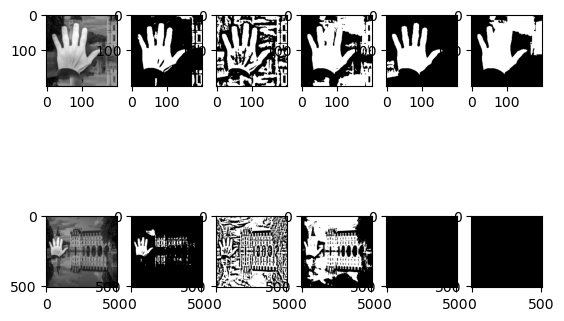

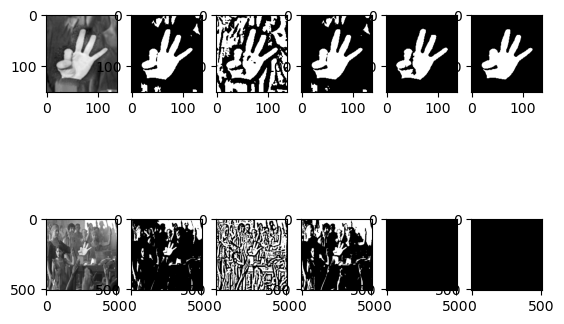

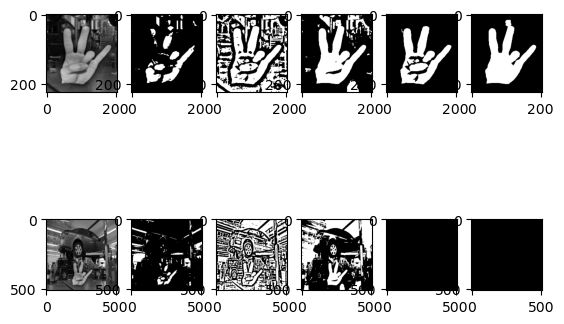

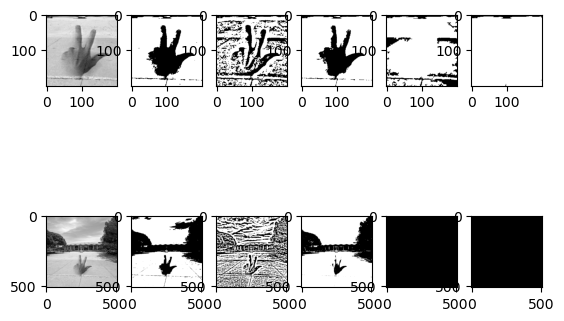

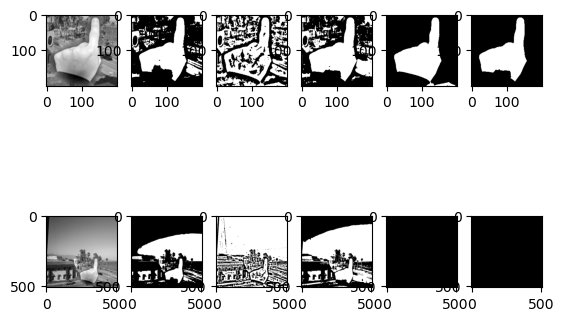

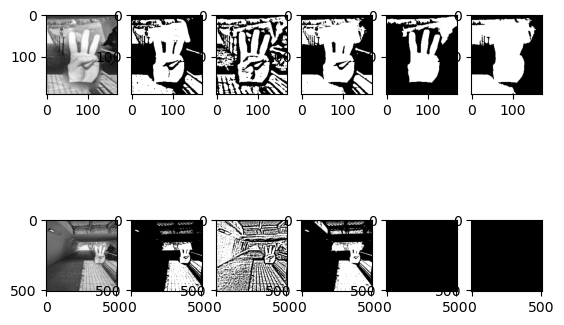

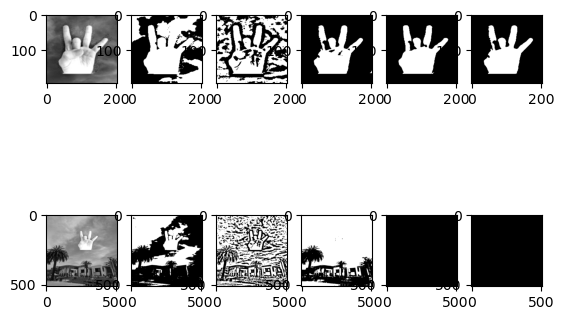

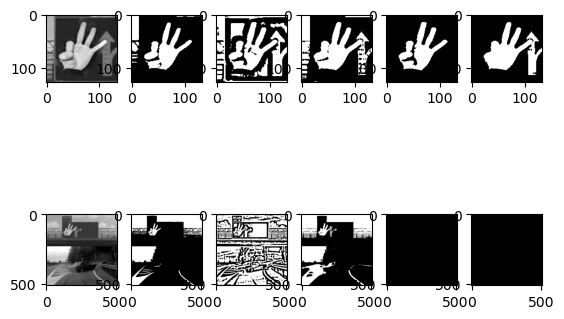

In [6]:
import os

def get_images(path):
    temp = []
    for file in os.listdir(path):
        if file.endswith("cropped.jpg"):
            temp.append(file)
    return temp

cropped_imgs = get_images("result/cropped")
print(cropped_imgs)

for img_file in cropped_imgs[:8]:
    img = cv.imread('result/cropped/' + img_file, cv.IMREAD_GRAYSCALE)
    img = cv.GaussianBlur(img,(3,3),0)
    fig, ax = plt.subplots(2,6)

    ret, th1 = cv.threshold(img, 150, 255, cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 2)
    ret, th3 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

    adaptive_contours, adaptive_hierarchy = cv.findContours(image=th2, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
    adaptive_copy = np.zeros((img.shape[0], img.shape[1]))
    adaptive_hand_contour = max(adaptive_contours, key = cv.contourArea)
    cv.fillPoly(adaptive_copy, pts=[adaptive_hand_contour], color=(255,255,255))

    otsu_contours, otsu_hierarchy = cv.findContours(image=th3, mode=cv.RETR_TREE, method=cv.CHAIN_APPROX_NONE)
    otsu_copy = np.zeros((img.shape[0], img.shape[1]))
    otsu_hand_contour = max(otsu_contours, key = cv.contourArea)
    cv.fillPoly(otsu_copy, pts=[otsu_hand_contour], color=(255,255,255))

    ax[0,0].imshow(img, cmap="gray")
    ax[0,1].imshow(th1, cmap="gray")
    ax[0,2].imshow(th2, cmap="gray")
    ax[0,3].imshow(th3, cmap="gray")
    ax[0,4].imshow(adaptive_copy, cmap="gray")
    ax[0,5].imshow(otsu_copy, cmap="gray")
    
#     res1 = cv.resize(th1, dsize=(50,50), interpolation=cv.INTER_LINEAR)
#     res3 = cv.resize(th3, dsize=(50,50), interpolation=cv.INTER_LINEAR)
#     res_adaptive_contour = cv.resize(adaptive_copy, dsize=(50,50), interpolation=cv.INTER_LINEAR)
#     res_otsu_contour = cv.resize(otsu_copy, dsize=(50,50), interpolation=cv.INTER_LINEAR)
#     cv.imwrite("result/segmented/" + img_file[0:8] + "_simple_thresh.jpg", res1)
#     cv.imwrite("result/segmented/" + img_file[0:8] + "_otsu_thresh.jpg", res3)
#     cv.imwrite("result/segmented/" + img_file[0:8] + "_adaptive_contour.jpg", res_adaptive_contour)
#     cv.imwrite("result/segmented/" + img_file[0:8] + "_otsu_contour.jpg", res_otsu_contour)

    img = cv.imread('result/poisson/' + img_file[:-12] + ".jpg", cv.IMREAD_GRAYSCALE)
    img = cv.GaussianBlur(img,(3,3),0)

    ret, th1 = cv.threshold(img, 150, 255, cv.THRESH_BINARY)
    th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 21, 2)
    ret, th3 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)
    
    blank = np.zeros((img.shape[0], img.shape[1]))
    
    ax[1, 0].imshow(img, cmap="gray")
    ax[1, 1].imshow(th1, cmap="gray")
    ax[1, 2].imshow(th2, cmap="gray")
    ax[1, 3].imshow(th3, cmap="gray")
    ax[1, 4].imshow(blank, cmap="gray")
    ax[1, 5].imshow(blank, cmap="gray")


## Other Areas of Exploration

* sci-kit-image has an active_contour function
* PixelLab library
    * uses PointRend, technique using neural networks and treating segmentation as a rendering problem 
    * builds on top of pyTorch
    * can be connected to live video